In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install mglearn

In [3]:
import mglearn

##### Knn(최근접이웃) 알고리즘

C:\Users\bitcamp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


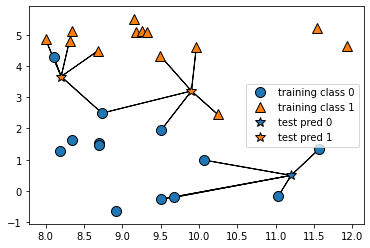

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

In [5]:
x,y = mglearn.datasets.make_forge()
y

C:\Users\bitcamp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [8]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
knn.score(x_train, y_train)

0.9

In [10]:
knn.score(x_test, y_test)

1.0

##### 과적합(overfitting)
* 알고리즘이 train data에 과도하게 학습이 되어, train data를 잘 맞추고 test data를 잘 
맞추지 못하는 현상..
*모델이 train data를 잘 맞추도록 지나치게 복잡하게 만들어진 경우..

##### 과적합을 해소하기 위해서 
* 데이터를 많이 확보
* 모델을 단순화시킨다 (학습을 방해...)
* 단순한 알고리즘을 사용.

In [11]:
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

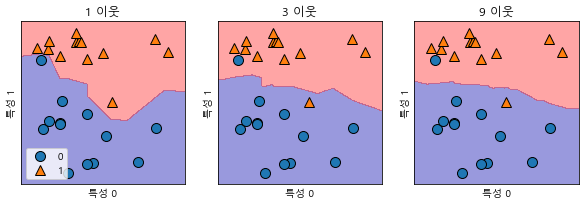

In [15]:
# binary classification

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(x, y)
    mglearn.plots.plot_2d_separator(clf, x, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(x[:, 0], x[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

In [16]:
# multiclass classification

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [17]:
x = cancer.data
y = cancer.target

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, stratify=cancer.target, random_state=66)

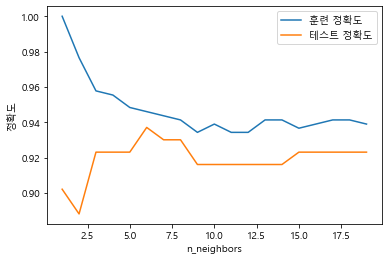

In [19]:
training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 n_neighbors 를 적용

for k in range(1, 20):
    
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(list(range(1, 20)), training_accuracy, label="훈련 정확도")
plt.plot(list(range(1, 20)), test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

In [20]:
# # 전체적으로 train data accuracy > test data accuracy

# # 과적합 (k=1) : 모델이 복잡함
# train data accuracy > test data accuracy

# # 과소적합 (k>=10) : 모델이 학습이 부족해서 예측능력이 낮은 경우..
# train data와 test data 모두에서 정확도가 낮다..

In [21]:
df = pd.read_csv('./ml_source_files/loan_data.csv')
y = df['not.fully.paid']
x = df.drop('not.fully.paid', axis=1)
x = pd.get_dummies(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=123, stratify=y)

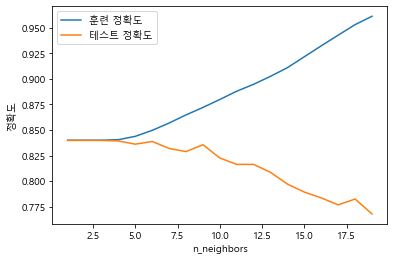

In [22]:
from sklearn.tree import DecisionTreeClassifier

training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 n_neighbors 를 적용

for k in range(1, 20, 1):
    
    # 모델 생성
    clf = DecisionTreeClassifier(max_depth=k)
    clf.fit(x_train, y_train)
    
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(x_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(x_test, y_test))
    
plt.plot(list(range(1, 20, 1)), training_accuracy, label="훈련 정확도")
plt.plot(list(range(1, 20, 1)), test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

In [23]:
### 회귀분석에서 과적합..
### 모델이 너무 복잡하면 과적합 되기가 쉽다..

In [24]:
house_df = pd.read_csv('./ml_source_files/house_price.csv')
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [25]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [26]:
house_df.isnull().sum().sort_values(ascending=False)[:10]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
dtype: int64

In [27]:
house_df.drop(['PoolQC','MiscFeature','Alley','FireplaceQu','LotFrontage'], axis=1, \
             inplace=True)

In [28]:
house_df.fillna(house_df.mean(), inplace=True)

In [29]:
house_df.isnull().sum().sort_values(ascending=False)

Fence           1179
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
                ... 
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
MSSubClass         0
SalePrice          0
Length: 76, dtype: int64

In [30]:
house_df_ohe = pd.get_dummies(house_df)

In [31]:
house_df_ohe.isnull().sum().sort_values(ascending=False)

Id                       0
BsmtQual_Ex              0
BsmtCond_Po              0
BsmtCond_Gd              0
BsmtCond_Fa              0
                        ..
Condition2_Feedr         0
Condition2_Norm          0
Condition2_PosA          0
Condition2_PosN          0
SaleCondition_Partial    0
Length: 275, dtype: int64

In [32]:
house_df_ohe.shape

(1460, 275)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [34]:
y = house_df_ohe['SalePrice']
x = house_df_ohe.drop(['SalePrice','Id'], axis=1)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [36]:
lr = LinearRegression()

In [37]:
lr.fit(x_train, y_train)

LinearRegression()

In [38]:
train_preds = lr.predict(x_train)
test_preds = lr.predict(x_test)

In [39]:
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

In [40]:
print(train_mse, test_mse, train_mse/test_mse)  
# train에서 오차가 매우 작음.. => 과적합.. => 모델을 단순화...

335214282.98443574 1243892769.9648156 0.2694880869786851


In [41]:
print(len(lr.coef_  ))  # 계수가 273개인 매우 복잡한 회귀모델.. => 과적합..

273


In [42]:
lr.coef_

array([-1.68894783e+01,  8.65256922e-01,  5.68966774e+03,  6.13567867e+03,
        2.94850103e+02,  6.73600500e+01,  2.26555730e+01,  1.87621122e+01,
        1.05293609e+01, -3.11722696e+00,  2.61742485e+01,  1.16914477e+01,
        3.65685973e+01, -1.23538407e+01,  3.59062143e+01,  1.61595907e+03,
       -2.11172361e+03,  3.40518355e+03,  1.89309903e+03, -4.94744516e+03,
       -1.40290159e+04,  1.09213085e+03,  1.01168852e+03, -4.55553294e-01,
        9.31647147e+03, -2.65509137e+00,  1.56124967e+01,  4.61561516e+00,
       -5.30085858e+00,  1.08090495e+01,  2.84835126e+00,  9.99201881e+01,
       -3.54051088e-01,  1.30172327e+01,  1.29549317e+02, -2.96847126e+04,
        1.85455818e+04,  3.12521340e+03,  8.79236700e+03, -7.78449669e+02,
       -2.33633816e+04,  2.33633816e+04,  4.04933834e+02,  4.03996695e+03,
       -5.47113192e+03,  1.02623114e+03,  3.80540036e+03,  2.13204968e+03,
       -9.14421932e+03,  3.20676928e+03, -3.83079168e-09,  8.47649062e-10,
       -6.97008013e+02,  

In [43]:
# 회귀모델의 과적합 해소 => 회귀모델을 단순화..

# 1. 변수의 수를 줄인다.. => lasso
# 2. 계수의 값을 작게 만든다.. => ridge

In [44]:
from sklearn.linear_model import Ridge, Lasso

In [45]:
rid = Ridge(alpha=1000)
rid.fit(x_train, y_train)

rid_train_preds = rid.predict(x_train)
rid_test_preds = rid.predict(x_test)

rid_train_mse = mean_squared_error(y_train,rid_train_preds)
rid_test_mse = mean_squared_error(y_test,rid_test_preds)
print(rid_train_mse, rid_test_mse, rid_train_mse/rid_test_mse)

1165481959.4689722 1320593038.5347285 0.8825443762464016


In [46]:
las = Lasso(alpha=10000)
las.fit(x_train, y_train)

las_train_preds = las.predict(x_train)
las_test_preds = las.predict(x_test)

las_train_mse = mean_squared_error(y_train,las_train_preds)
las_test_mse = mean_squared_error(y_test,las_test_preds)
print(las_train_mse, las_test_mse, las_train_mse/las_test_mse)

1390993915.0602677 1500624633.4698818 0.9269432768432463


In [47]:
from sklearn.metrics import r2_score

In [48]:
train_acc = []
test_acc = []
mse_ratio = []

for a in np.arange(0.001, 1, 0.001):
    rid = Ridge(alpha=a)
    rid.fit(x_train, y_train)

    rid_train_preds = rid.predict(x_train)
    rid_test_preds = rid.predict(x_test)

    rid_train_mse = mean_squared_error(y_train,rid_train_preds)
    rid_test_mse = mean_squared_error(y_test,rid_test_preds)

    train_acc.append(r2_score(y_train, rid_train_preds))
    test_acc.append(r2_score(y_test, rid_test_preds))
    mse_ratio.append(rid_train_mse/rid_test_mse)
    print('----------')

----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------

----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------
----------

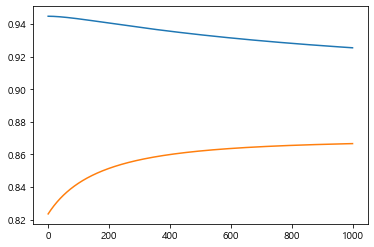

In [49]:
plt.plot(train_acc)
plt.plot(test_acc)